Ejercicios Unidad 1

1. Elija una de las imágenes color que tomó para la clase y aplique separación de canales y elija un método para transformarla en escala de grises. Muestre por pantalla los resultados obtenidos. 

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
img = cv2.imread("glasses_pictures/foto (8).jpg")

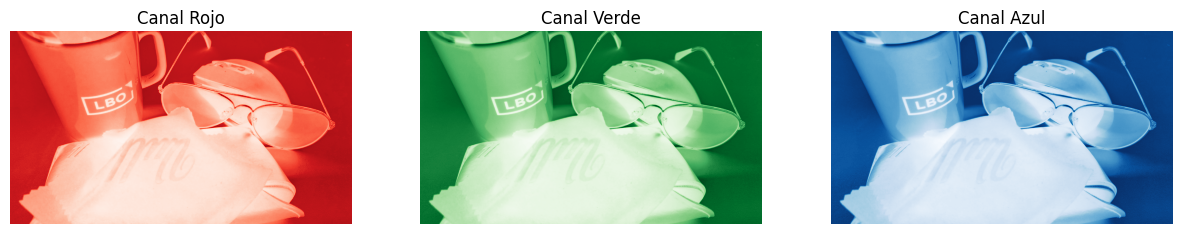

In [4]:
R, G, B = img[:, :, 0], img[:, :, 1], img[:, :, 2]
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(R, cmap='Reds')
axs[0].set_title('Canal Rojo')
axs[0].axis('off')

axs[1].imshow(G, cmap='Greens')
axs[1].set_title('Canal Verde')
axs[1].axis('off')

axs[2].imshow(B, cmap='Blues')
axs[2].set_title('Canal Azul')
axs[2].axis('off')

plt.show()

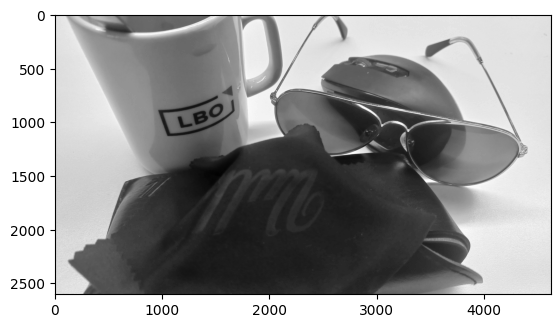

In [5]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')

2. Con las fotografías pedidas por la cátedra la clase pasada (la foto de objetos con fondo liso, y fotos del mismo producto en un contexto más complejo) usar los métodos de extracción de características (esos anteriores al Deep Learning) para encontrar la ubicación del producto dentro de la imagen. 

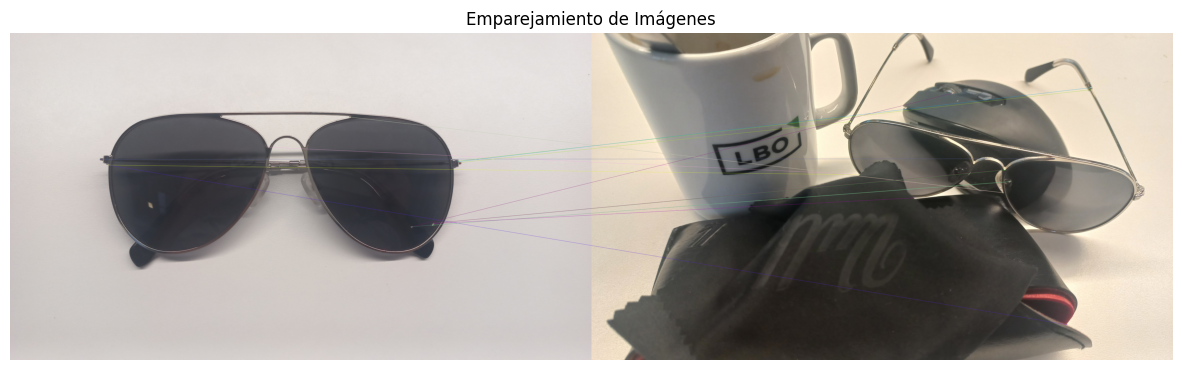

In [6]:
image1 = cv2.imread('glasses_pictures/foto (1).jpg')
image2 = cv2.imread('glasses_pictures/foto (8).jpg')

# Inicializar ORB
orb = cv2.ORB_create()

# Detectar keypoints y calcular descriptores
keypoints1, descriptors1 = orb.detectAndCompute(image1, None)
keypoints2, descriptors2 = orb.detectAndCompute(image2, None)

# Crear un objeto BFMatcher para encontrar las coincidencias
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Encontrar coincidencias
matches = bf.match(descriptors1, descriptors2)

# Ordenar las coincidencias en orden de distancia (cuanto más baja, mejor)
matches = sorted(matches, key=lambda x:x.distance)

# Dibujar las primeras 15 coincidencias
matched_img = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches[:15], outImg=None, flags=2)

# Ajustar el tamaño de la figura de matplotlib
plt.figure(figsize=(15, 20))
plt.imshow(cv2.cvtColor(matched_img, cv2.COLOR_BGR2RGB))
plt.title('Emparejamiento de Imágenes')
plt.axis('off')
plt.show()

3. Para leer un paper, conviene arrancar leyendo el abstract, luego hacer una lectura por los títulos de las distintas secciones, prestar atención a las imágenes y su texto asociado, y leer con detalle la conclusión. 
    
    Se dividirá la comisión completa en 5 grupos de dialogo, cada grupo tomará un paper diferente de los que se muestran en la sección “Técnicas de extracción de características mediante aprendizaje profundo.” Les proponemos hacer una primera lectura del mismo. Luego de la misma un par de valientes del grupo dará una breve presentación de los mismos.
    
    [01_superpoint.pdf](https://drive.google.com/file/d/1tx6GrL1Cr-LnQBSH1K9xffPxbasQugE9/view?usp=drive_web)
    
    [02_d2net.pdf](https://drive.google.com/file/d/1-b07QhWcRdQWYhZxQ6wY97KN_Oiu1M8L/view?usp=drive_web)
    
    [03_NeurIPS.pdf](https://drive.google.com/file/d/1su2irZiTg1brgTUaAGxgUquHzZDzp_7d/view?usp=drive_web)
    
    [04_liu2018.pdf](https://drive.google.com/file/d/1IQT7nKAHXQD7opxk7ws-mLok7NGdXe09/view?usp=drive_web)
    
    [05_Zhang_Deep_Graphical_Feature_Learning.pdf](https://drive.google.com/file/d/15mFrmQvKmCFX_WeFNYfticSOrOKcKVTL/view?usp=drive_web)

4. Con los videos de youtube.com de cámara fija pedidos para esta clase, aplicar los algoritmos de detección de movimiento vistos en la teoría.

5. Genere un video en un patio o en un hall de edificio donde en un principio se vea vacío y luego aparezca una persona. Mediante los métodos de motion detection (sin usar deep learning) logre una detección de la persona cuando entra al cuadro suponiendo la utilidad para una cámara de seguridad. 
Luego sobre el mismo video aplique los algoritmos de flujo denso y disperso que se mostraron en clase. 
Escriba una reflexión sobre los resultados en el formato md dentro del Jupyter Notebook.

In [28]:
captura = cv2.VideoCapture("walking_videos/walking(3).mp4")
ret, prev = captura.read()
prev = cv2.cvtColor(prev, cv2.COLOR_BGR2GRAY)
while (captura.isOpened()):
  ret, imagen = captura.read()
  if ret == True:
    gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)        
    frame_diff = cv2.absdiff(gray, prev)     
    ret, thres = cv2.threshold(frame_diff, 35, 255, cv2.THRESH_BINARY)

    prev = gray.copy()       
    cv2.imshow('original',imagen)    
    cv2.imshow('foregroundMask',thres)
    if cv2.waitKey(30) == ord('s'):
      break
  else: break
captura.release()
cv2.destroyAllWindows()

In [14]:
captura = cv2.VideoCapture("walking_videos/walking(3).mp4")
ret, prev = captura.read()
backSub = cv2.createBackgroundSubtractorMOG2(detectShadows=False)
while (captura.isOpened()):
  ret, imagen = captura.read()
  if ret == True:
    fgMask = backSub.apply(imagen)   

    cv2.imshow('original',imagen)    
    cv2.imshow('foregroundMask',fgMask)
    if cv2.waitKey(30) == ord('s'):
      break
  else: break
captura.release()
cv2.destroyAllWindows()

In [29]:
#Apply morfology

captura = cv2.VideoCapture("walking_videos/walking(2).mp4")
ret, prev = captura.read()
prev = cv2.cvtColor(prev, cv2.COLOR_BGR2GRAY)
while (captura.isOpened()):
  ret, imagen = captura.read()
  if ret == True:
    gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)        
    frame_diff = cv2.absdiff(gray, prev)     
    ret, thresh = cv2.threshold(frame_diff, 35, 255, cv2.THRESH_BINARY)

    prev = gray.copy()       
    
    kernel = np.ones((5,5),np.uint8)
    dilated = cv2.dilate(thresh, kernel, iterations = 1)

    dilated = dilated.astype(np.uint8)

    contours, _ = cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    for cnt in contours:
      area = cv2.contourArea(cnt)
      if area > 1000:
        cv2.drawContours(imagen, [cnt], 0, (0,255,0), 2)

    cv2.imshow('original',imagen)
    if cv2.waitKey(30) == ord('s'):
      break
  else: break
captura.release()
cv2.destroyAllWindows()

In [9]:
def process_frame_difference_full(new_image, prev_image, **kwargs):
    # Convertir las imágenes a escala de grises
    new_gray = cv2.cvtColor(new_image, cv2.COLOR_RGB2GRAY)
    prev_gray = cv2.cvtColor(prev_image, cv2.COLOR_RGB2GRAY)

    # Calcular la diferencia absoluta entre los fotogramas actual y anterior
    frame_diff = cv2.absdiff(new_gray, prev_gray)

    # Normalizar la imagen de diferencia
    norm_diff = cv2.normalize(frame_diff, None, 0, 255, cv2.NORM_MINMAX)

    # Umbralizar la imagen para resaltar las diferencias
    _, thresh = cv2.threshold(norm_diff, 30, 255, cv2.THRESH_BINARY)

    # Dilatar la imagen umbralizada para mejorar la detección de contornos
    kernel = np.ones((5,5),np.uint8)
    dilated = cv2.dilate(thresh, kernel, iterations = 1)

    # Convertir la imagen dilatada a formato adecuado para findContours
    dilated = dilated.astype(np.uint8)

    # Encontrar contornos en la imagen dilatada
    contours, _ = cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Dibujar cuadros delimitadores alrededor de los contornos
    if kwargs.get('draw_mode', 0) == 0:
      result_image = draw_contours(new_image, contours)
    elif kwargs.get('draw_mode', 0) == 1:
      result_image = draw_contours(thresh, contours)

    return result_image

In [10]:
# Función para procesar el flujo óptico denso
def process_dense_optical_flow(new_image, prev_image):
    # Convierte la nueva imagen a escala de grises
    gray = cv2.cvtColor(new_image, cv2.COLOR_BGR2GRAY)

    if not hasattr(process_dense_optical_flow, "init_done"):
        process_dense_optical_flow.prev_gray = cv2.cvtColor(new_image, cv2.COLOR_BGR2GRAY)
        process_dense_optical_flow.mask = np.zeros_like(new_image)
        process_dense_optical_flow.mask[..., 1] = 255
        process_dense_optical_flow.init_done = True

    if process_dense_optical_flow.init_done:
        prev_gray = process_dense_optical_flow.prev_gray
        mask = process_dense_optical_flow.mask

    # Calcula el flujo óptico
    flow = cv2.calcOpticalFlowFarneback(prev_gray, gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)
    # Computa magnitud y ángulo de los vectores 2D
    magnitude, angle = cv2.cartToPolar(flow[..., 0], flow[..., 1])
    # Establece el tono de la imagen según la dirección del flujo óptico
    mask[..., 0] = angle * 180 / np.pi / 2
    # Establece el valor de la imagen según la magnitud del flujo óptico
    mask[..., 2] = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
    # Convierte de HSV a RGB
    rgb = cv2.cvtColor(mask, cv2.COLOR_HSV2BGR)
    # Actualiza la imagen previa a gris
    process_dense_optical_flow.prev_grayprev_gray = gray.copy()
    return rgb

In [31]:
captura = cv2.VideoCapture("walking_videos/walking.mp4")
ret, prev = captura.read()
prev = cv2.cvtColor(prev, cv2.COLOR_BGR2GRAY)
while (captura.isOpened()):
  ret, imagen = captura.read()
  if ret == True:  
    frame_diff = process_dense_optical_flow(imagen, prev)

    prev = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    cv2.imshow('original',imagen)    
    cv2.imshow('foregroundMask', frame_diff)
    if cv2.waitKey(30) == ord('s'):
      break
  else: break
captura.release()
cv2.destroyAllWindows()

error: OpenCV(4.8.1) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<1,-1,-1>,struct cv::impl::A0x11a46be7::Set<3,4,-1>,struct cv::impl::A0x11a46be7::Set<0,2,5>,3>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 3
